In [1]:
import warnings
warnings.filterwarnings('ignore') # disable warnings relateds to versions of tf
import numpy as np
import dianna
import onnx

from onnx_tf.backend import prepare
import matplotlib.pyplot as plt
from pathlib import Path

2023-07-23 16:22:55.138398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 16:22:55.542538: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-23 16:22:55.542561: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-23 16:22:56.755241: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# # load dataset
data = np.load(Path().absolute().parent / 'data/binary-mnist.npz')
# load testing data and the related labels
X_test = data['X_test'].astype(np.float32).reshape([-1, 28, 28, 1]) / 255
y_test = data['y_test']

In [3]:
# Load saved onnx model
onnx_model_path = Path('../models', 'mnist_model_tf.onnx')
onnx_model = onnx.load(onnx_model_path)
# get the output node
output_node = prepare(onnx_model, gen_tensor_dict=True).outputs[0]

2023-07-23 16:22:59.687877: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-23 16:22:59.688116: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-23 16:22:59.688148: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian): /proc/driver/nvidia/version does not exist
2023-07-23 16:22:59.689250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
scores = prepare(onnx_model).run(X_test)[f'{output_node}']
scores_indices = np.argsort(scores.max(axis=1))
nsamples = 100
prob_range = .5

prob = prob_range
sample_indices = []
for idx in scores_indices: 
    if scores[idx].max() > prob:
        sample_indices.append(idx)
        prob += prob_range / nsamples

np.save('../data/mnist_sample.npy', data['X_test'][sample_indices])
scores[sample_indices]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-07-23 16:23:06.433304: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 183006720 exceeds 10% of free system memory.
2023-07-23 16:23:06.589935: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 183006720 exceeds 10% of free system memory.
2023-07-23 16:23:06.731591: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 183006720 exceeds 10% of free system memory.
2023-07-23 16:23:06.810887: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 311869440 exceeds 10% of free system memory.
2023-07-23 16:23:07.092524: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 311869440 exceeds 10% of free system memory.


array([[0.50103104, 0.49896887],
       [0.50657696, 0.493423  ],
       [0.4870078 , 0.51299214],
       [0.47869465, 0.52130526],
       [0.5268018 , 0.47319815],
       [0.53240806, 0.467592  ],
       [0.53450626, 0.46549365],
       [0.53516006, 0.46483985],
       [0.54152083, 0.45847908],
       [0.548066  , 0.4519339 ],
       [0.4471883 , 0.5528116 ],
       [0.44067955, 0.5593204 ],
       [0.4393693 , 0.5606307 ],
       [0.4297149 , 0.570285  ],
       [0.42618632, 0.5738137 ],
       [0.4241363 , 0.5758636 ],
       [0.58537114, 0.41462895],
       [0.41276965, 0.58723027],
       [0.591211  , 0.4087889 ],
       [0.39739138, 0.6026086 ],
       [0.60531074, 0.3946892 ],
       [0.39411977, 0.6058803 ],
       [0.6150188 , 0.38498116],
       [0.38481352, 0.6151865 ],
       [0.37883347, 0.6211665 ],
       [0.37492347, 0.62507653],
       [0.36917955, 0.6308205 ],
       [0.36457154, 0.63542837],
       [0.35691208, 0.64308786],
       [0.6452054 , 0.3547946 ],
       [0.

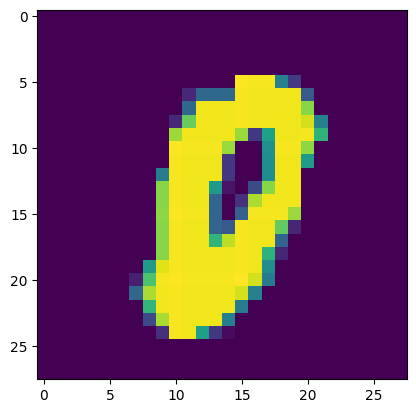

In [24]:
plt.imshow(X_test[sample_indices[16]])

In [6]:
images = np.load('../data/mnist_sample.npy').reshape((-1, 28, 28, 1)) / 255.